## BA 545 Course Project 2: Machine Team 4 
#### Online Shoppers Purchasing Intentions
##### Michael Disanto, Dawn Massey PhD CPA CGMA, Brian Nicholls
###### Final Models (4) - Spring 2020
----------------------------------------------------------------------


### **Table of Contents:**

0. [Preparing for Analyisis](#part4.0)
1. [Initial Review and Vizualization of the Data](#part4.1)
2. [Process the Data for Initial Data Models](#part4.2)
3. [Split and Run the Final Models with Selected Features and Optimized hyperperameters](#part4.3)
4. [Evaluate all the methods and compare using Ensambel Ranking](#part4.4)
5. [Run and Evaluate the Final Models with Over Sampled data using SMOTE](#part4.5)
6. [Run and Evaluate the Final Models using TPOT](#part4.6)


## 0. Preparing for Analysis  <a name="part4.0"></a>
####  Import the necesary packages for reading, analyzing, tidying, medeling, & evaluating the data

In [85]:
# # TO USE FOR ENTIRE TEAM
# import pandas as pd
# import numpy as np
# from pandas_profiling import ProfileReport
# import statsmodels.api as sm
# from scipy import stats
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

In [86]:
# Excluding Items not in Fairfield Jupiter Lab
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

In [87]:
# Import the necesary packages for reading, analyzing, tidying, modeling, & evaluating the data 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test)

from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)

from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)

# Imputation
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

# Train/Test Split
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()

from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()

from sklearn.svm import SVC 
# svc = SVC(kernel='linear')

from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)

from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)

# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)

# Packages for Over/Under Sampling
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import NearMiss

import warnings
warnings.filterwarnings('ignore')

# 1. Initial review and vizualization of the data  <a name="part4.1"></a>

In [88]:
# Pull in our original data and a copy for the base model
df = pd.read_csv('online_shoppers_intention.csv', na_values=r'-')
df_base = df.copy()

In [89]:
# Investigate the datatypes and descriptive statistics of the dataset
display(df_base.info())
display(df_base.describe())
print(' ')
display(df_base.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

None

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


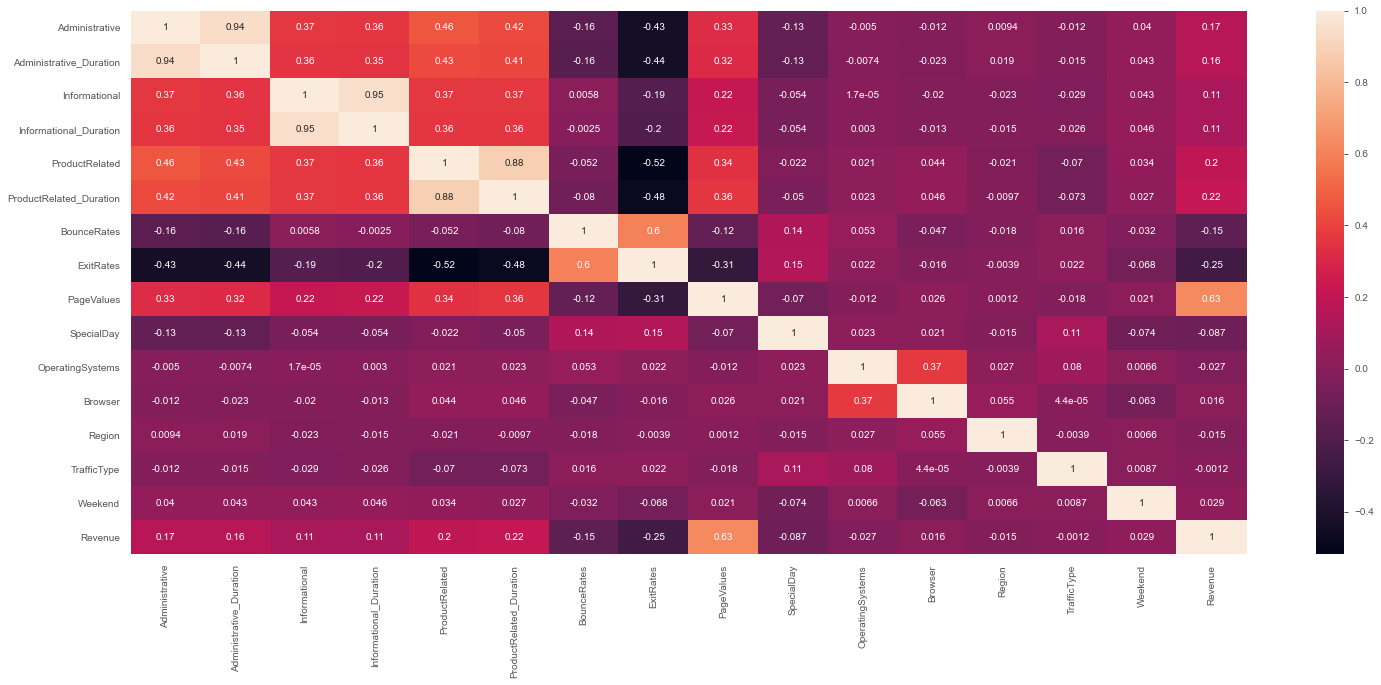

In [90]:
# Correlation Heatmap for the dataframe
spearman =df.corr(method ='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(spearman, annot=True)

# 2. Process the data for Initial Data Models  <a name="part4.2"></a>

    2.0 Pipeline [Prep] - Create subsets and list to be used later in the pipeline:

In [91]:
# Create Continuous Variable List
df_continuous = df.iloc[:,:9]
continuous_df_list = df_continuous.columns.tolist()

# Create Categorical Variable List
df_categorical = df.iloc[:,9:-1]
categorical_df_list = df_categorical.columns.tolist()


    2.1 Pipeline [Impute] - Initial Imputation of Categorical Features:

In [92]:
# Pipeline - Initial Imputation of Categorical Features:

## Replace the VisitorType 'Other' with the variable's mode, namely: 'Returning_Visitor'
df['VisitorType'] = df['VisitorType'].replace('Other','Returning_Visitor')
df.groupby('VisitorType').count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
VisitorType,,,,,,,,,,,,,,,,,
New_Visitor,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694
Returning_Visitor,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636


In [93]:
# Encode Revenue before splitting the data to allow for modeling

enc = LabelEncoder()

df['VisitorType'] = enc.fit_transform(df['VisitorType'])
df['Weekend'] = enc.fit_transform(df['Weekend'])
df['Revenue'] = enc.fit_transform(df['Revenue'])

In [94]:
# Pipeline - Binning Categorical Features:

def holiday_bin_func(month) :
    if month == 'May':
        return int(1)
    elif month == 'Feb':
        return int(1)
    else:
        return int(0)
    
df['Holiday_Bin'] = df['Month'].apply(holiday_bin_func)

##Reduce months to the top 4 in which there are transactions and "other"
def month_bin_func(month) :
    if month == 'May':
        return int(5)
    elif month == 'Nov':
        return int(11)
    elif month == 'Mar':
        return int(3)
    elif month == 'Dec':
        return int(12)
    else:
        return int(0)
    
df['Month_Bin'] = df['Month'].apply(month_bin_func)


##Encode month names to numerical representations

def month_func(month) :
    if month == 'Jan':
        return int(1)
    elif month == 'Feb':
        return int(2)
    elif month == 'Mar':
        return int(3)
    elif month == 'Apr':
        return int(4)
    elif month == 'May':
        return int(5)
    elif month == 'June':
        return int(6)
    elif month == 'Jul':
        return int(7)
    elif month == 'Aug':
        return int(8)
    elif month == 'Sep':
        return int(9)
    elif month == 'Oct':
        return int(10)
    elif month == 'Nov':
        return int(11)
    elif month == 'Dec':
        return int(12)

df['Month'] = df['Month'].apply(month_func)

def month_quarterly_func(month) :
    if month <= 3:
        return int(1)
    elif month >= 4 and month <= 6:
        return int(2)
    elif month >= 7 and month <= 9:
        return int(3)
    elif month >= 10 and month <= 12:
        return int(4)

df['Quarter'] = df['Month'].apply(month_quarterly_func)

##Reduce categories for Operating Systems to the top 3 plus "other"
### Operating Systems – is a categorical variable and most of the data (~95%) is in one of three operating systems (2, 1, 3). 
def binning_operating_systems(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Operating Systems > 3

df['OperatingSystems_Bin']=df['OperatingSystems'].apply(binning_operating_systems)   # Creating a new column in the df


      
##Reduce categories for Browser to the top 3 plus "other"
### Browser – is a categorical variable and most the data (~91%) come from three browsers (2, 1, 4).
def binning_browser(B):
    if (B == 3) or (B > 4): 
        return(3) 
    else:
        return(B) 

df['Browser_Bin']=df['Browser'].apply(binning_browser)   # Creating a new column in the df
      
      
##Reduce categories for Region to the top 4 plus "other"
### Region – is a categorical variable for region from which the visitor came. The top four account for ~77% of the data (i.e., region 1, 3, 4, 2).
def binning_region(B):
    if (B <= 4):
        return(B)
    else:
        return(5) # creating a category of 5 for all Regions > 4

df['Region_Bin']=df['Region'].apply(binning_region)   # Creating a new column in the df

      
      
##Reduce categories for TrafficType to the top 3 plus "other"
### TrafficType – is a categorical variable to indicate how visitor arrived at website. The top three account for approximately 67% of the referrals (i.e., types 2, 1, 3).
def binning_traffic_type(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Traffic Types > 3

df['TrafficType_Bin']=df['TrafficType'].apply(binning_traffic_type)   # Creating a new column in the df

In [95]:
# add creates features / bins to categorical list
added_categorical_features = df.iloc[:,-7:]
added_categorical_list = added_categorical_features.columns.tolist()

##Combine added features list with categorical list
categorical_df_list = categorical_df_list + added_categorical_list

##Check work by printing combined categorical list
categorical_df_list

['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Holiday_Bin',
 'Month_Bin',
 'Quarter',
 'OperatingSystems_Bin',
 'Browser_Bin',
 'Region_Bin',
 'TrafficType_Bin']

    2.2 Pipeline [Transform] - Initial Log Transformation Continuous Features:

In [96]:
# Impute zeros to one (by adding one to all values) before applying the log transformation

# Impute Zeros before doing the log
for column in continuous_df_list:
    df[column] = df[column] + 1

# Check imputation by printing a samplle of rows
display(df[continuous_df_list].sample(20))

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
4630,9,51.750000,2,27.75,23,554.583333,1.000000,1.017857,6.798000
10369,1,1.000000,1,1.00,22,1052.166667,1.000000,1.009524,15.140844
5210,1,1.000000,1,1.00,5,47.000000,1.000000,1.050000,1.000000
3104,5,131.500000,1,1.00,7,166.500000,1.000000,1.033333,1.000000
1902,1,1.000000,1,1.00,33,1917.633333,1.015625,1.026563,1.000000
8018,1,1.000000,1,1.00,25,611.633333,1.000000,1.020833,1.000000
10630,1,1.000000,3,22.00,44,1826.557143,1.000000,1.018116,1.000000
9287,1,1.000000,1,1.00,10,126.500000,1.007407,1.022222,1.000000
11509,10,142.750000,3,311.50,10,124.500000,1.000000,1.017647,1.000000
5002,1,1.000000,1,1.00,71,1454.900000,1.010145,1.020773,1.000000


    2.3 Pipeline [Calcualated Features] - Initial Feature Engineering of continuous features:

In [97]:
# Perform initial log transformation on PageValues
df['PageValues_Log'] = np.log(df['PageValues'])

# Create features combining ('ExitRates' and 'BounceRates'), which are highly correlated with each other and the target
df['Bounce_Exit_Rate_Avg'] = (df['BounceRates'] + df['ExitRates'])/2
df['Bounce_Exit_Rate_WeightedAvg'] = ((df['BounceRates']*.6) + (df['ExitRates']*.4))
df['Bounce_Exit_Rate_Avg_PageVales'] = (df['Bounce_Exit_Rate_Avg'] / df['PageValues']) # add a chart to compare the trends and distributions
df['Bounce_per_Exit_Rate'] = df['BounceRates'] / df['ExitRates']

# Create features combining ('Administrative' and 'Administrative_Duration') and ('ExitRates' and 'BounceRates'), which are highly correlated with each other and the target
df['Admin_per_Exit'] = df['Administrative'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_Bounce'] = df['Administrative'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'

df['Admin_dur_per_Exit'] = df['Administrative_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_Bounce'] = df['Administrative_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['Administrative_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'


# Create features combining ('Informational' and 'Informational_Duration') and, ('ExitRates' and 'BounceRates'), which are highly correlated with each other and the target
df['Info_per_Exit'] = df['Informational'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_per_Bounce'] = df['Informational'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_per_bounce_exit_avg'] = df['Informational'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'

df['Info_dur_per_Exit'] = df['Informational_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_dur_per_Bounce'] = df['Informational_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_dur_per_bounce_exit_avg'] = df['Informational_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'


# Create features combining ('ProductRelated' and 'ProductRelated_Duration') and, ('ExitRates' and 'BounceRates'), which are highly correlated with each other and the target
df['Product_per_Exit'] = df['ProductRelated'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_per_Bounce'] = df['ProductRelated'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Prod_per_bounce_exit_avg'] = df['ProductRelated'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'

df['Product_dur_per_Exit'] = df['ProductRelated_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_dur_per_Bounce'] = df['ProductRelated_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg
df['Prod_dur_per_bounce_exit_avg'] = df['ProductRelated_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'


# Create features combining ('Administrative_Duration','Informational_Duration' and 'ProductRelated_Duration'), which are highly correlated with each other and the target
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Total_Duration_Avg'] = (df['Total_Duration'])/3
df['Admin_Duration_percent_TotalDuration'] = df['Administrative_Duration'] / df['Total_Duration']
df['Info_Duration_percent_TotalDuration'] = df['Informational_Duration'] / df['Total_Duration']
df['Product_Duration_percent_TotalDuration'] = df['ProductRelated_Duration'] / df['Total_Duration']


# Create features related to 'Total_Duration' as compared to ('ExitRates', 'BounceRates' and a combination of the two), which are highly correlated with each other and the target
df['TotalDuration_per_ExitRates'] = df['Total_Duration'] / df['ExitRates']
df['TotalDuration_per_BounceRates'] = df['Total_Duration'] / df['BounceRates']
df['TotalDuration_per_BounceExit_avg'] = df['Total_Duration'] / df['Bounce_Exit_Rate_Avg']


#Create features using 'PageValues', which is highly correlated with the target,as the denominator
df['Admin_per_PageValues'] = df['Administrative'] / df['PageValues']
df['Admin_Duration_per_PageValues'] = df['Administrative_Duration'] / df['PageValues']
df['Informational_per_PageValues'] = df['Informational'] / df['PageValues']
df['Info_Duration_per_PageValues'] = df['Informational_Duration'] / df['PageValues']
df['ProductRelated_per_PageValues'] = df['ProductRelated'] / df['PageValues']
df['Product_Duration_per_PageValues'] = df['ProductRelated_Duration'] / df['PageValues']
df['TotalDuration_per_PageValues'] = df['Total_Duration'] / df['PageValues']
df['Exit_per_PageValues'] = df['ExitRates'] / df['PageValues']
df['Bounce_per_PageValues'] = df['BounceRates'] / df['PageValues']

In [98]:
# Add transformed / calculated features to continuous list

##Create added features list (to include PageValues_Log)
added_continuous_features = df.iloc[:,-40:]
added_continuous_list = added_continuous_features.columns.tolist()

In [99]:
##Combine added features list with continuous list
continuous_df_list = continuous_df_list + added_continuous_list

In [100]:
##Check work by printing a list of the added continouous columns
continuous_df_list

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'PageValues_Log',
 'Bounce_Exit_Rate_Avg',
 'Bounce_Exit_Rate_WeightedAvg',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_per_Exit_Rate',
 'Admin_per_Exit',
 'Admin_per_Bounce',
 'Admin_per_bounce_exit_avg',
 'Admin_dur_per_Exit',
 'Admin_dur_per_Bounce',
 'Admin_dur_per_bounce_exit_avg',
 'Info_per_Exit',
 'Info_per_Bounce',
 'Info_per_bounce_exit_avg',
 'Info_dur_per_Exit',
 'Info_dur_per_Bounce',
 'Info_dur_per_bounce_exit_avg',
 'Product_per_Exit',
 'Product_per_Bounce',
 'Prod_per_bounce_exit_avg',
 'Product_dur_per_Exit',
 'Product_dur_per_Bounce',
 'Prod_dur_per_bounce_exit_avg',
 'Total_Duration',
 'Total_Duration_Avg',
 'Admin_Duration_percent_TotalDuration',
 'Info_Duration_percent_TotalDuration',
 'Product_Duration_percent_TotalDuration',
 'TotalDuration_per_ExitRates',
 'TotalDuration_per_Bounc

In [101]:
# Review the created columns in a sample
new_continuous_df = df.loc[:,continuous_df_list]
y = df.loc[:,'Revenue']
display(new_continuous_df.sample(20))
display(' ')
new_categorical_df = df.loc[:,categorical_df_list]
display(new_categorical_df.sample(20))


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,PageValues_Log,...,TotalDuration_per_BounceExit_avg,Admin_per_PageValues,Admin_Duration_per_PageValues,Informational_per_PageValues,Info_Duration_per_PageValues,ProductRelated_per_PageValues,Product_Duration_per_PageValues,TotalDuration_per_PageValues,Exit_per_PageValues,Bounce_per_PageValues
5057,1,1.000000,1,1.0,10,261.300000,1.000000,1.005556,17.322444,2.852003,...,262.570637,0.057729,0.057729,0.057729,0.057729,0.577286,15.084476,15.199933,0.058049,0.057729
4331,10,65.088235,2,22.0,52,1934.898930,1.011259,1.032132,1.000000,0.000000,...,1979.050000,10.000000,65.088235,2.000000,22.000000,52.000000,1934.898930,2021.987165,1.032132,1.011259
2310,1,1.000000,1,1.0,34,664.233333,1.026471,1.059804,1.000000,0.000000,...,638.682331,1.000000,1.000000,1.000000,1.000000,34.000000,664.233333,666.233333,1.059804,1.026471
483,1,1.000000,1,1.0,2,1.000000,1.200000,1.200000,1.000000,0.000000,...,2.500000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.200000,1.200000
2261,1,1.000000,1,1.0,20,951.000000,1.000000,1.011111,1.000000,0.000000,...,947.734807,1.000000,1.000000,1.000000,1.000000,20.000000,951.000000,953.000000,1.011111,1.000000
8090,1,1.000000,1,1.0,11,517.750000,1.020000,1.080000,1.000000,0.000000,...,495.000000,1.000000,1.000000,1.000000,1.000000,11.000000,517.750000,519.750000,1.080000,1.020000
5982,3,10.000000,1,1.0,39,1148.696667,1.000000,1.027642,4.673829,1.541979,...,1143.886849,0.641872,2.139573,0.213957,0.213957,8.344336,245.772075,248.125605,0.219872,0.213957
9800,1,1.000000,1,1.0,50,2991.312500,1.012245,1.038231,1.000000,0.000000,...,2919.626683,1.000000,1.000000,1.000000,1.000000,50.000000,2991.312500,2993.312500,1.038231,1.012245
3505,3,339.000000,1,1.0,18,1206.566667,1.012500,1.037500,20.236250,3.007476,...,1508.845529,0.148249,16.752116,0.049416,0.049416,0.889493,59.624025,76.425556,0.051269,0.050034
3093,2,51.333333,1,1.0,22,587.189286,1.000000,1.005556,1.000000,0.000000,...,637.751088,2.000000,51.333333,1.000000,1.000000,22.000000,587.189286,639.522619,1.005556,1.000000


' '

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Holiday_Bin,Month_Bin,Quarter,OperatingSystems_Bin,Browser_Bin,Region_Bin,TrafficType_Bin
12211,0.0,12,3,2,4,2,0,1,0,12,4,3,2,4,2
8030,0.0,11,2,5,3,13,1,1,0,11,4,2,3,3,4
3456,0.8,5,2,2,1,13,1,0,1,5,2,2,2,1,4
5507,0.0,11,1,1,1,3,0,0,0,11,4,1,1,1,3
10358,0.0,11,1,1,8,15,1,0,0,11,4,1,1,5,4
8249,0.0,11,2,2,1,13,1,0,0,11,4,2,2,1,4
861,0.0,3,3,2,1,1,1,0,0,3,1,3,2,1,1
3108,0.8,5,2,4,1,3,1,0,1,5,2,2,4,1,3
4248,0.0,5,3,2,5,2,1,0,1,5,2,3,2,5,2
10792,0.0,11,4,1,4,3,1,0,0,11,4,4,1,4,3


    2.4 Pipeline [Middle] - Min Max Standardization

In [102]:
# # Process the attributes that have a range outside of zero to one (0 - 1)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# scale = scaler.fit(new_continuous_df)
# scaled = scaler.transform(new_continuous_df)
# scaled_continuous_df = pd.DataFrame(scaled,columns = continuous_df_list)
# df[continuous_df_list] = scaled_continuous_df[continuous_df_list]

    2.5 Pipeline [Middle] - Normalize the data to address skew

In [103]:
# # Initially displaying the skewness of all attributes
# skew_df = pd.DataFrame(df[continuous_df_list].skew().abs())

# #filter skew attributes by absolute values of 0.5
# skew_over = skew_df[(skew_df > 0.5).any(axis=1)]
# skew_cols = skew_over.index.tolist()
# display(skew_cols)
# display(len(skew_cols))

In [104]:
# # Create the list of columns to adjust for skewness

# for i in skew_cols:
#     df[i+'_skew'] = df[i]
    
# cols_to_skew = df.iloc[:,-len(skew_cols):].columns

In [105]:
# continuous_skew_cols = cols_to_skew.tolist()
# continuous_df_list = continuous_df_list + continuous_skew_cols

In [106]:
# # Normalize the columns that have skewness using quantile_transform

# from sklearn.preprocessing import quantile_transform
# transformed_qt = quantile_transform(df[cols_to_skew],random_state=0,copy=True)
# transformed_qt_df = pd.DataFrame(transformed_qt,columns = cols_to_skew)
# df[cols_to_skew] = transformed_qt_df[cols_to_skew]


In [107]:
# # Display skewness after quantile_transform
# display(df[cols_to_skew].skew())

In [108]:
# # Create the list of columns that still need to be adjusted for skewness (i.e., after applying quantile_transform)
# Still_skew_df = pd.DataFrame(df[cols_to_skew].skew().abs())

# ##Filter skew attributes by an absolute value of 0.5
# still_skew_over = Still_skew_df[(Still_skew_df > 0.5).any(axis=1)]
# still_skew_list =(still_skew_over.index.tolist())
# display(still_skew_list)



In [109]:
# # Normalize the remaining columns that continue to have skewness (after applying quantile_transform) using PowerTransformer
# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='yeo-johnson')
# transform = pt.fit(df[still_skew_list])
# transformed = pt.transform((df[still_skew_list]))
# transformed_df = pd.DataFrame(transformed,columns = still_skew_list)
# df[still_skew_list] = transformed_df[still_skew_list]


In [110]:
# # check for remaining skewness
# display(df[still_skew_list].skew())

In [111]:
# spearman_possible =df[continuous_df_list].corrwith(df['Revenue'])
# spearman_possible.head(60)
# # plt.figure(figsize=(30,15))
# # sns.heatmap(spearman_possible, annot=True)

In [112]:
corr_df = pd.DataFrame(df[continuous_df_list].corrwith(df['Revenue']).abs())

#filter skew attributes by absolute values of 0.20
corr_over = corr_df[(corr_df > 0.20).any(axis=1)]
#display(corr_over.index)

continuous_model_cols = corr_over.index.tolist()
display(continuous_model_cols)
display(len(continuous_model_cols))

['ExitRates',
 'PageValues',
 'PageValues_Log',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Informational_per_PageValues',
 'Exit_per_PageValues',
 'Bounce_per_PageValues']

7

In [114]:
# determined possible features list by removing corresponding, duplicative features that were not adjusted for skewness
 
possible_Features_list =['ExitRates',
 'PageValues',
 'PageValues_Log',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Informational_per_PageValues',
 'Exit_per_PageValues',
 'Bounce_per_PageValues','Revenue']    
possible_Features_list.sort()
possible_Features_list

['Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_per_PageValues',
 'ExitRates',
 'Exit_per_PageValues',
 'Informational_per_PageValues',
 'PageValues',
 'PageValues_Log',
 'Revenue']

In [133]:
sorted_possible_Features_list = ['Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_per_PageValues',
 'ExitRates',
 'Exit_per_PageValues',
 'Informational_per_PageValues',
 'PageValues',
 'PageValues_Log']

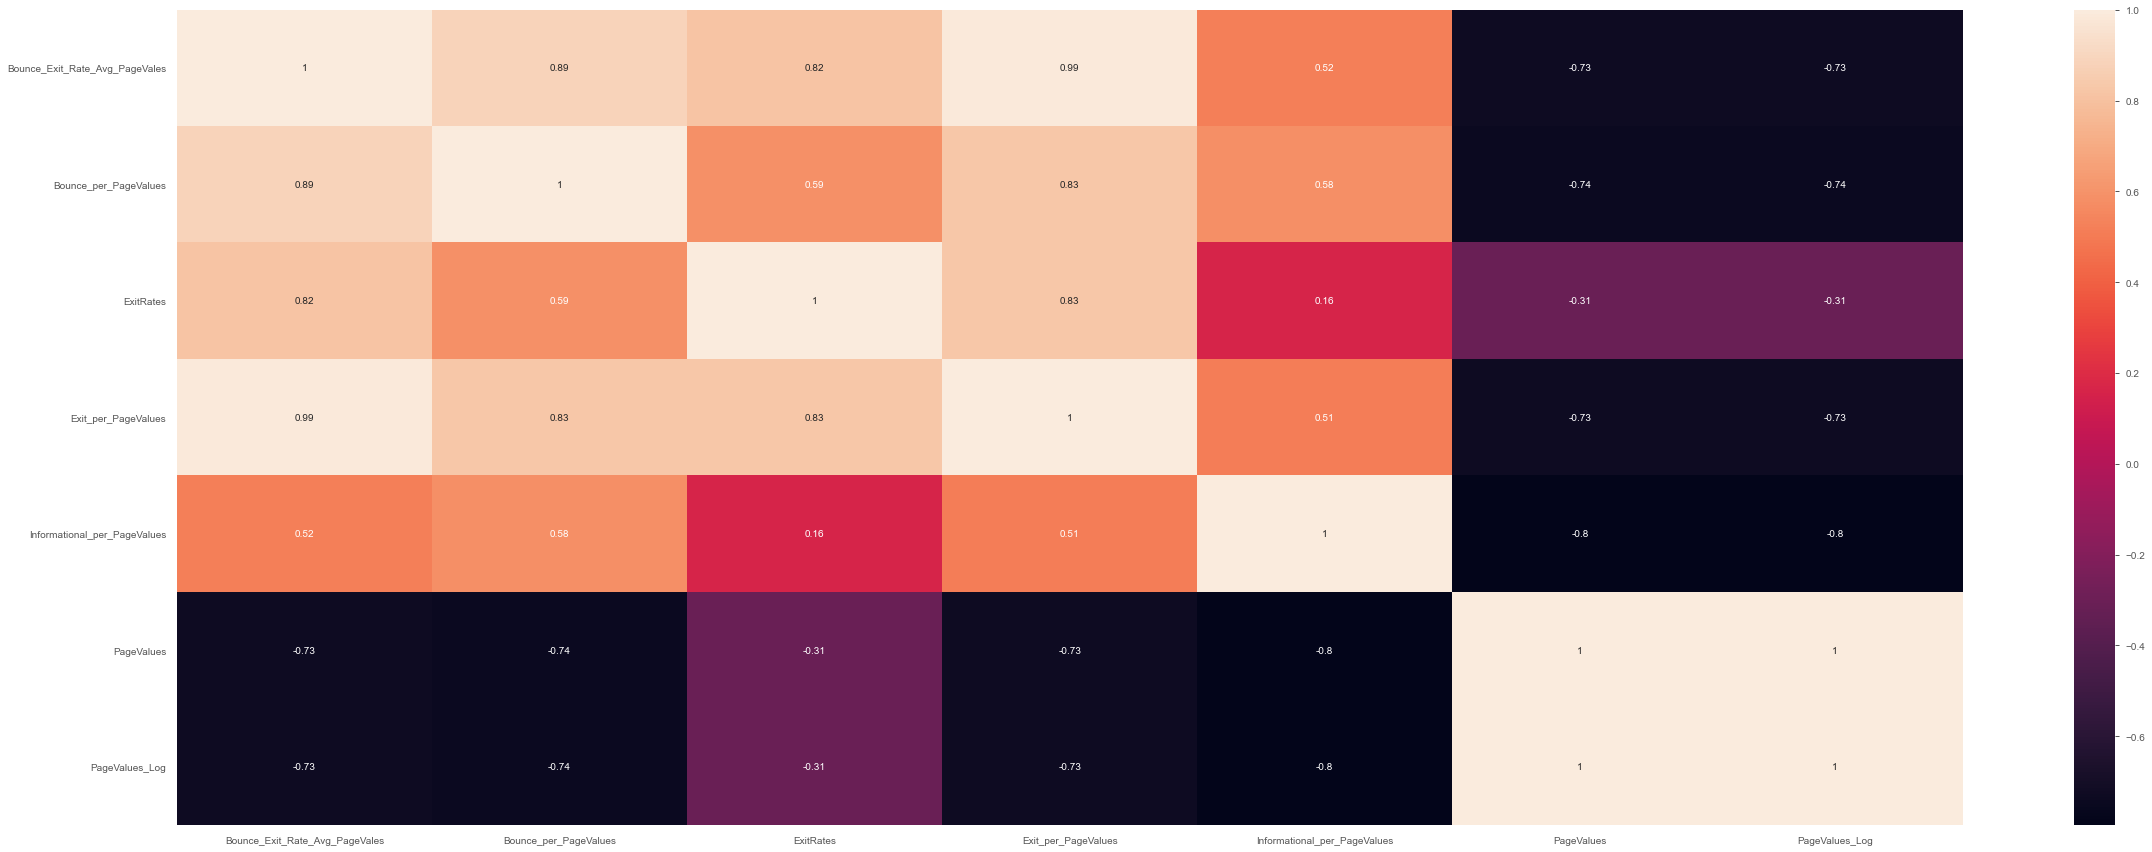

In [134]:
#Correlation Heatmap for the dataframe
possible_Corr_df = df.loc[:,sorted_possible_Features_list]

spearman_possible =possible_Corr_df.corr(method= 'spearman')
plt.figure(figsize=(40,15))
sns.heatmap(spearman_possible, annot=True)

In [135]:
# ['Admin_dur_per_Exit_skew',
#  'Admin_dur_per_bounce_exit_avg_skew',
#  'Admin_per_Exit_skew', KEEP HIGHEST CORRELATION WITH Y
#  'Admin_per_bounce_exit_avg_skew',

#  Admin_per_PageValues_skew KEEP UNIQUELY INCLUDES ADMIN
 
#  'Bounce_Exit_Rate_Avg_skew', KEEP NO JUSTIFICATION FOR WEIGHTED AVERAGE
#  'Bounce_Exit_Rate_WeightedAvg_skew', 
 
#  'Bounce_Exit_Rate_Avg_PageVales',
#  'Bounce_Exit_Rate_Avg_PageVales_skew',
#  'Bounce_per_PageValues',
#  'Bounce_per_PageValues_skew',KEEP BECAUSE ADJUSTED FOR SKEWNESS AND ALEADY HAVE A VARIABLE WITH BOUNCE EXIT RATE AVERAGE
 

 
#  'ExitRates',
#  'ExitRates_skew',
#  'Exit_per_PageValues',
#  'Exit_per_PageValues_skew', KEEP BECAUSE ADJUSTED FOR SKEWNESS AND IS MORE CORRELATED WITH Y THAT THE OTHER EXIT Rate variables
 
#  'Info_Duration_per_PageValues_skew',
# 'Informational_per_PageValues',
#  'Informational_per_PageValues_skew', KEEP BECAUSE ADJUSTED FOR SKEWNESS AND IS MORE CORRELATED WITH Y

#  'Info_dur_per_Exit_skew',
#  'Info_dur_per_bounce_exit_avg_skew',
#  'Info_per_Exit_skew', KEEP BECAUSE ADJUSTED FOR SKEWNESS AND IS consistent IN CORRELATED AND SAME COMPARISON AS THE OTHER VARIABLES
#  'Info_per_bounce_exit_avg_skew',

 
#  'PageValues',
#  'PageValues_Log',
#  'PageValues_Log_skew', KEEP PER TAO , KEEP LET FEATURE SELECTION ELIMINATE
#  'PageValues_skew',
 
#  'Prod_dur_per_bounce_exit_avg_skew',
#  'Prod_per_bounce_exit_avg_skew',
# 'Product_dur_per_Exit_skew', 
# 'Product_per_Exit_skew', KEEP BECAUSE ADJUSTED FOR SKEWNESS AND IS consistent IN CORRELATED AND SAME COMPARISON AS THE OTHER VARIABLES
# 'Product_dur_per_Bounce_skew',
#  'Product_per_Bounce_skew',
 
#  'ProductRelated_Duration_skew', KEEP BECAUSE ITS SOMEWHAT UNIQUE
 
#  'ProductRelated_per_PageValues_skew', KEEP CLEAR WINNER IN CORRELATION TO Y
#  'Product_Duration_per_PageValues_skew',

#  'TotalDuration_per_BounceExit_avg_skew',
#  'TotalDuration_per_BounceRates_skew', KEEP BECAUSE ITS SOMEWHAT UNIQUE OTHER VARIABLES USE EXITRATES
#  'TotalDuration_per_ExitRates_skew',
 
#  'TotalDuration_per_PageValues_skew', KEEP BECAUSE ITS SOMEWHAT UNIQUE

#  'Total_Duration_Avg_skew', 
#  'Total_Duration_skew', KEEP LET FEATURE SELECTION ELIMINATE
#  'Revenue']

In [136]:
# Filtered out intercorrelated featues for feature importance
continuous_feature_selection = sorted_possible_Features_list

display(len(continuous_feature_selection))

7

# Based on the above:
    - Need to choose only one of the variables for which there is a corresponding duration variable - namely: 
    - Administrative_skew or Administrative_Duration_skew (correlation 0.94); initial decision is to utilize Administrative_skew as it is more highly correlated with the target variable
    - Informational_skew or Informational_Duration_skew (correlation 0.95); initial decision is to utilize Informational_skew because Informational_Duration_skew is incorporated into the Total_Duration variables (discussed below)
    - ProductRelated_skew or Product_RelatedDuration_skew (correlation 0.88); initial decision is to utilize ProductRelated_Duration_skew as it is more highly correlated with the target variable

    - Need to choose only one of the variables that are 100% corelated – namely:
    - The PageValues variables (since they all are 100% correlated); initial decision is to use PagesValues_skew (rather than PageValues_Log_skew or PageValues_Log10_skew) because the “raw” feature is more interpretable than its logged counterparts
    - Total_Duration_skew and Total_Duration_Avg_skew; initial decision is to forego both in favor of engineered features that incorporate total duration
    - Bounce_Exit_Rate_Avg_skew and Bounce_Exit_Rate_WeightedAvg_skew; initial decision is to utilize the last one since it incorporates both Bounce and Exit Rates and utilizes a weighted average, which gives relative weights to the inputs

    - Need to carefully consider variables containing “Bounce” and “Exit” since BounceRates_skew and ExitRates_skew are highly correlated (correlation 0.60) – namely:
    - ExitRates_skew and Bounce_Exit_Rate_Avg_skew (correlation 0.98) as well as ExitRates_skew and  Bounce_Exit_Rate_WeightedAvg_skew (correlation 0.96); initial decision is to utilize the last one since it incorporates both Bounce and Exit Rates and utilizes a weighted                 average, which gives relative weights to the inputs
    - Admin_per_Exit_skew and Admin_per_Bounce_skew (correlation 0.97) Initial decision is to use Admin_per Exit_skew because it is more highly correlated with the target variable.

    - Exit_per_PageValues and Bounce_per_PageValues (correlation 0.82) Initial decision is to use Bounce_per_PageValues because it has fewer high correlations with the other variables 

**Need to choose only one of the variables from pairs that capture related information - namely:**
    
    - TotalDuration_per_PageValues_skew or Product_Duration_per_PageValues_skew (correlation 0.99) Initial decision is to use Product_Duration_per_PageValues_skew because it is more highly correlated with the target variable.
    - Admin_per_PageValues_skew and AdminDuration_per_PageValues_skew (correlation 0.76); initial decision is to include Admin_per_PageValues_skew since it is much more highly correlated with y

**Additionally, we recommend including**
   
    - Month because retail businesses are seasonal; and
    - VisitorType because of the importance of customer loyalty in a retail environment




Categorical Features Manual Filter

In [137]:
cat_corr_df = pd.DataFrame(df[categorical_df_list].corrwith(df['Revenue']).abs())

#filter skew attributes by absolute values of 0.001
cat_corr_over = cat_corr_df[(cat_corr_df > 0.0).any(axis=1)]

categorical_model_cols = cat_corr_over.index.tolist()
display(categorical_model_cols)
display(len(categorical_model_cols))


['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Holiday_Bin',
 'Month_Bin',
 'Quarter',
 'OperatingSystems_Bin',
 'Browser_Bin',
 'Region_Bin',
 'TrafficType_Bin']

15

In [138]:
cat_corr_df
Cat_feature_selection = cat_corr_df.index.tolist()
Cat_feature_selection

['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Holiday_Bin',
 'Month_Bin',
 'Quarter',
 'OperatingSystems_Bin',
 'Browser_Bin',
 'Region_Bin',
 'TrafficType_Bin']

In [139]:
#Correlation Heatmap for the dataframe
cat_Corr_df = df.loc[:,categorical_df_list]

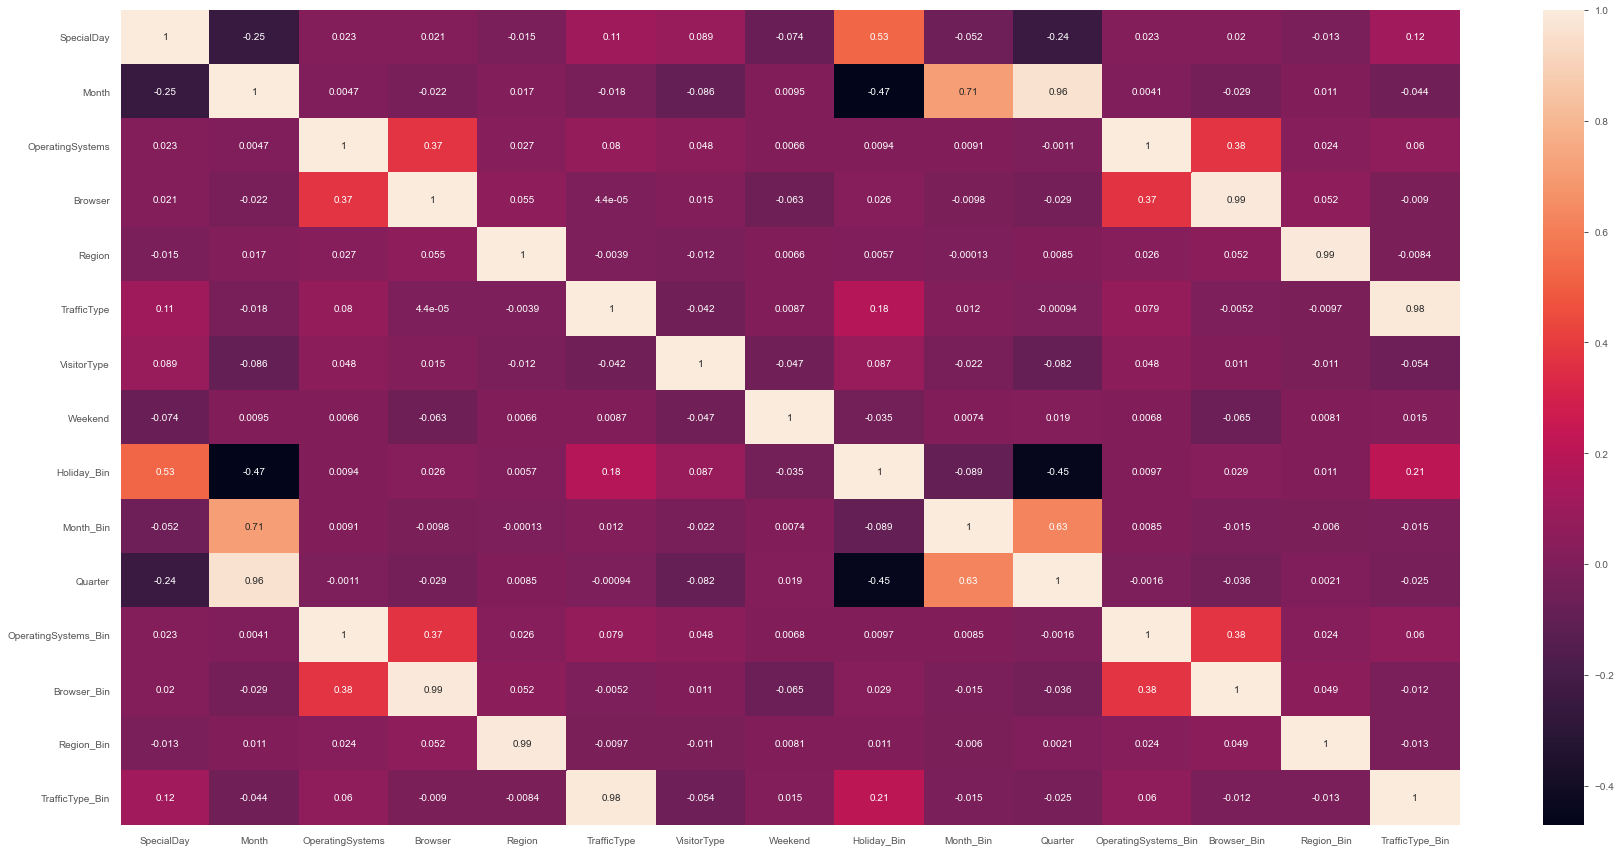

In [140]:
cat_spearman_possible =cat_Corr_df.corr(method ='spearman')
plt.figure(figsize=(30,15))
sns.heatmap(cat_spearman_possible, annot=True)

In [141]:
Cat_feature_selection =['SpecialDay','VisitorType','Weekend','Holiday_Bin','Month_Bin','Quarter','OperatingSystems_Bin','Browser_Bin','Region_Bin','TrafficType_Bin']

# Based on the above:
    - Need to choose only one of the variables for which there is a corresponding duration variable - namely: 
    - Administrative_skew or Administrative_Duration_skew (correlation 0.94); initial decision is to utilize Administrative_skew as it is more highly correlated with the target variable
    - Informational_skew or Informational_Duration_skew (correlation 0.95); initial decision is to utilize Informational_skew because Informational_Duration_skew is incorporated into the Total_Duration variables (discussed below)
    - ProductRelated_skew or Product_RelatedDuration_skew (correlation 0.88); initial decision is to utilize ProductRelated_Duration_skew as it is more highly correlated with the target variable

    - Need to choose only one of the variables that are 100% corelated – namely:
    - The PageValues variables (since they all are 100% correlated); initial decision is to use PagesValues_skew (rather than PageValues_Log_skew or PageValues_Log10_skew) because the “raw” feature is more interpretable than its logged counterparts
    - Total_Duration_skew and Total_Duration_Avg_skew; initial decision is to forego both in favor of engineered features that incorporate total duration
    - Bounce_Exit_Rate_Avg_skew and Bounce_Exit_Rate_WeightedAvg_skew; initial decision is to utilize the last one since it incorporates both Bounce and Exit Rates and utilizes a weighted average, which gives relative weights to the inputs

    - Need to carefully consider variables containing “Bounce” and “Exit” since BounceRates_skew and ExitRates_skew are highly correlated (correlation 0.60) – namely:
    - ExitRates_skew and Bounce_Exit_Rate_Avg_skew (correlation 0.98) as well as ExitRates_skew and  Bounce_Exit_Rate_WeightedAvg_skew (correlation 0.96); initial decision is to utilize the last one since it incorporates both Bounce and Exit Rates and utilizes a weighted                 average, which gives relative weights to the inputs
    - Admin_per_Exit_skew and Admin_per_Bounce_skew (correlation 0.97) Initial decision is to use Admin_per Exit_skew because it is more highly correlated with the target variable.

    - Exit_per_PageValues and Bounce_per_PageValues (correlation 0.82) Initial decision is to use Bounce_per_PageValues because it has fewer high correlations with the other variables 

**Need to choose only one of the variables from pairs that capture related information - namely:**
    
    - TotalDuration_per_PageValues_skew or Product_Duration_per_PageValues_skew (correlation 0.99) Initial decision is to use Product_Duration_per_PageValues_skew because it is more highly correlated with the target variable.
    - Admin_per_PageValues_skew and AdminDuration_per_PageValues_skew (correlation 0.76); initial decision is to include Admin_per_PageValues_skew since it is much more highly correlated with y

**Additionally, we recommend including**
   
    - Month because retail businesses are seasonal; and
    - VisitorType because of the importance of customer loyalty in a retail environment




In [142]:
# Filtered out intercorrelated featues for feature importance
feature_importance_list = Cat_feature_selection + continuous_feature_selection
display(feature_importance_list,len(feature_importance_list))

['SpecialDay',
 'VisitorType',
 'Weekend',
 'Holiday_Bin',
 'Month_Bin',
 'Quarter',
 'OperatingSystems_Bin',
 'Browser_Bin',
 'Region_Bin',
 'TrafficType_Bin',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_per_PageValues',
 'ExitRates',
 'Exit_per_PageValues',
 'Informational_per_PageValues',
 'PageValues',
 'PageValues_Log']

17

# 3. Split and run the Final Models with Selected Features and Optimized Hyperperameters  <a name="part4.3"></a>

In [143]:
# Create a full list of continuous and categorical features based on aditional data preparation 
continuous_categorical_list = feature_importance_list

# Specify features (X) and target (Y) in dataset
X,y = df.loc[:,continuous_categorical_list],df.loc[:,'Revenue']

In [144]:
# Resplit the data based on additional data preparation completed post initial split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=500) 

### 3.1 Naive Bayes Model (NB)
>   <b> Accuracy: </b> 87%
<br><b> AUC: </b> 87%
<br><b> Next Steps: </b> Additional parameter tuning

###0. Step 0: Import Needed Packages

In [145]:
# import the metrics class
from sklearn import metrics
# from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# import other required modules for confusion matrices
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

###1. Step 1: Specify the Model and run forward selection feature importance

In [146]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

In [147]:
# Source: https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(list(initial_features))>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [148]:
best_features = forward_selection(X_train, y_train, significance_level=0.05)

###2. Steps 2-4: Generate Test Data, Build the Models & Assess the Models for y2

y Accuracy: 0.8791565287915653

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3158
           1       0.56      0.77      0.65       541

    accuracy                           0.88      3699
   macro avg       0.76      0.83      0.79      3699
weighted avg       0.90      0.88      0.89      3699



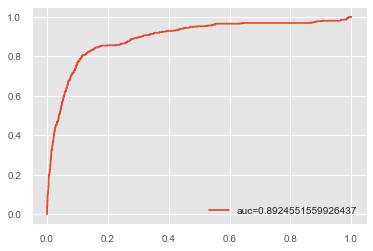

Text(0.5, 257.44, 'Predicted label')

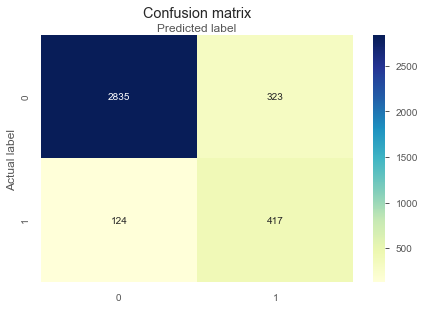

In [149]:
#Train the model using the training sets - for y2 (Sale)
gnb.fit(X_train[best_features], y_train)

#Predict the response for test dataset for y2
y_NB_pred = gnb.predict(X_test[best_features])

# Model Accuracy, how often is the classifier correct?
# Accuracy for y2
print("y Accuracy:",metrics.accuracy_score(y_test, y_NB_pred))
print("")

#Can use classification report to assess model adequacy, too
class_names=[0,1] # name  of classes
print(metrics.classification_report(y_test, y_NB_pred, labels=class_names))

#AUC for y
y_NB_pred_proba = gnb.predict_proba(X_test[best_features])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_NB_pred_proba)
auc = metrics.roc_auc_score(y_test, y_NB_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_NB_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [150]:
#Conclusion - With accuracy of 81% for each y1 and y2, the Naive Bayes model is superior to the base model which had an accuracy of 71% for each target.
#However, there is still room for improvement.

In [151]:
# MD's Modeling Work

### 3.2 Decision Tree Model (DT)
>   <b> Accuracy: </b> 85%
<br><b> AUC: </b> 69%
<br><b> Next Steps: </b> Additional parameter tuning

#### Specify the Model

In [152]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#### Build the Model

In [153]:
clf = DecisionTreeClassifier()

In [154]:
from sklearn.feature_selection import SelectFromModel

embeded_dt_selector = SelectFromModel(DecisionTreeClassifier(), max_features=10)
embeded_dt_selector.fit(X_train, y_train)
embeded_dt_support = embeded_dt_selector.get_support()
embeded_dt_feature = X_train.loc[:,embeded_dt_support].columns.tolist()
print(str(len(embeded_dt_feature)), 'selected features')
print(embeded_dt_feature)

4 selected features
['Bounce_Exit_Rate_Avg_PageVales', 'ExitRates', 'Exit_per_PageValues', 'Informational_per_PageValues']


In [155]:
# PARAMETER OPTIMIZATION CODE USING GRID SEARCH:

#Add in GridSearchCV
from sklearn.model_selection import GridSearchCV

#Define the grid
criterion=['gini','entropy']
splitter=['best','random']
max_depth=[2,3,4,5]
min_samples_split = [2,3]
param_grid = dict(criterion=criterion, splitter=splitter,max_depth=max_depth,min_samples_split=min_samples_split)

#Run the grid search
#import time

dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv = 10, n_jobs=-1)

#start_time = time.time()
grid_result_dt = grid_dt.fit(X_train[best_features], y_train)
# Summarize results
print("Best: %f using %s" % (grid_result_dt.best_score_, grid_result_dt.best_params_))

#The below is for execution time - not important for us right now, so commented out
# print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.892248 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'splitter': 'random'}


In [156]:
dt_Peram_dict = grid_result_dt.best_params_

In [157]:
#Predict the response for test dataset
y_DT_pred = grid_dt.predict(X_test[best_features])

In [158]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_DT_pred))

Accuracy: 0.8894295755609625


#### Assess the Model

In [159]:
# Evaluating the Classification Report
print(metrics.classification_report(y_test, y_DT_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3158
           1       0.61      0.66      0.64       541

    accuracy                           0.89      3699
   macro avg       0.78      0.80      0.79      3699
weighted avg       0.89      0.89      0.89      3699



In [160]:
# Evaluating the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_DT_pred))

[[2931  227]
 [ 182  359]]


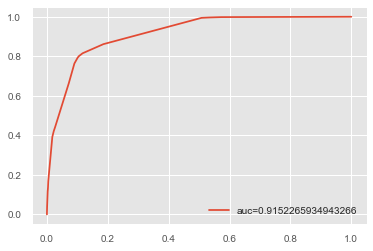

Text(0.5, 257.44, 'Predicted label')

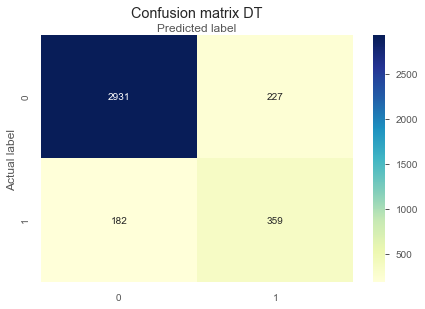

In [161]:
#AUC for y
y_DT_pred_proba = grid_dt.predict_proba(X_test[best_features])[::,1]
fpr_DT, tpr_DT, _ = metrics.roc_curve(y_test,  y_DT_pred_proba)
auc_DT = metrics.roc_auc_score(y_test, y_DT_pred_proba)
plt.plot(fpr_DT,tpr_DT,label="auc="+str(auc_DT))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_DT = metrics.confusion_matrix(y_test, y_DT_pred)
cnf_matrix_DT
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DT), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

85.45% is much better than the baseline model of 70%

### 3.3 Random Forest Model (RF)
>   <b> Accuracy: </b> 89%
<br><b> AUC: </b> 87%
<br><b> Next Steps: </b> Additional parameter tuning

#### Specify the Model

#### Build Model for y2 (Sale)

In [162]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [163]:
from sklearn.feature_selection import SelectFromModel

embeded_rf_selector = SelectFromModel(RandomForestClassifier(), max_features=8)
embeded_rf_selector.fit(X_train, y_train)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

7 selected features
['Bounce_Exit_Rate_Avg_PageVales', 'Bounce_per_PageValues', 'ExitRates', 'Exit_per_PageValues', 'Informational_per_PageValues', 'PageValues', 'PageValues_Log']


In [164]:
# # PARAMETER OPTIMIZATION CODE USING GRID SEARCH - TAKES FOREVER...consider not running!: 
# # Reference: https://urldefense.com/v3/__https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74*5Cn__;JQ!!KIFmrYtlezdzESbnm_I!UCnvV89lnf4zyYniQ1tmp0cEqfro80T-cjcfwd7vRwyp_8aShQmgOyEKh8XH9GthAmgdQtSt5GubdFc$ 
#Add in GridSearchCV
from sklearn.model_selection import GridSearchCV

## Define the grid

# Number of trees in random forest
n_estimators = [10,20,30]
random_state = [10,20,50,100]
criterion=['gini','entropy']
# Number of features to consider at every split
max_features = ['log2', 'sqrt',.10,.15]
# Maximum number of levels in tree
max_depth = [1,5,10]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the parameter grid
param_grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth,criterion=criterion,
               min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,random_state=random_state)

#Run the grid search
#import time

rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 5, n_jobs=-1)

#start_time = time.time()
grid_result_rfc = grid_rfc.fit(X_train[best_features], y_train)
# Summarize results
print("Best: %f using %s" % (grid_result_rfc.best_score_, grid_result_rfc.best_params_))

# #The below is for execution time - not important for us right now, so commented out
# # print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.895146 using {'criterion': 'gini', 'max_depth': 5, 'max_features': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20, 'random_state': 100}


In [165]:
rfc_Peram_dict = grid_result_rfc.best_params_

In [166]:

#Create a Gaussian Classifier
# rfc = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
# grid_rfc.fit(X_train[embeded_rf_feature],y_train)

y_RF_pred = grid_rfc.predict(X_test[best_features])

In [167]:
# Evaluation of the Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_RF_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.65      0.58      0.61       541

    accuracy                           0.89      3699
   macro avg       0.79      0.76      0.78      3699
weighted avg       0.89      0.89      0.89      3699



[[2991  167]
 [ 228  313]]


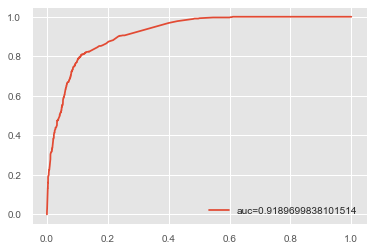

Text(0.5, 257.44, 'Predicted label')

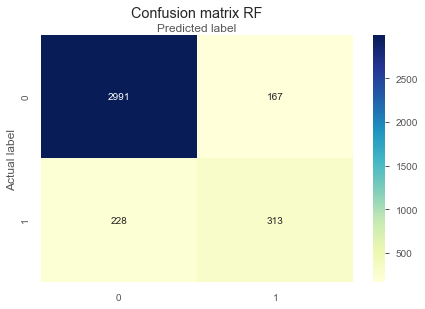

In [168]:
# Evaluation of the Confusion Matrix
print(confusion_matrix(y_test, y_RF_pred))

#AUC for y
y_RF_pred_proba = grid_rfc.predict_proba(X_test[best_features])[::,1]
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_test,  y_RF_pred_proba)
auc_RF = metrics.roc_auc_score(y_test, y_RF_pred_proba)
plt.plot(fpr_RF,tpr_RF,label="auc="+str(auc_RF))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_RF = metrics.confusion_matrix(y_test, y_RF_pred)
cnf_matrix_RF
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### 90% accuracy for both Random Forest Models, so far better than the Decision Tree Models

### 3.4 Support Vector Machines (SVM) Classification Model (SVC)
>   <b> Accuracy: </b> 88%
<br><b> AUC: </b> 85%
<br><b> Next Steps: </b> SVC ensemble classifiers 

In [66]:
###1. Step 1: Specify the Model
from sklearn import svm
svc = svm.SVC(kernel='rbf',cache_size=7000,gamma= 'scale', C=1, probability =True, degree = 3) # gamma= 0.001 , kernel='poly', 'rbf',‘linear’

In [67]:
from sklearn.feature_selection import RFE
svc = svm.SVC(kernel='linear',cache_size=7000,gamma= 'auto', C=5, probability =True, degree = 5)

svc_selector = RFE(estimator=svc, n_features_to_select=10, step=20, verbose=5)
svc_selector.fit(X_train, y_train)
svc_support = svc_selector.get_support()
svc_feature = X_train.loc[:,svc_support].columns.tolist()

print(str(len(svc_feature)), 'selected features')
print(svc_feature)

Fitting estimator with 24 features.
10 selected features
['Bounce_Exit_Rate_Avg_skew', 'Bounce_per_PageValues_skew', 'Exit_per_PageValues_skew', 'Informational_per_PageValues_skew', 'Info_per_Exit_skew', 'PageValues_Log_skew', 'ProductRelated_Duration_skew', 'ProductRelated_per_PageValues_skew', 'TotalDuration_per_BounceRates_skew', 'Total_Duration_skew']


In [68]:
# PARAMETER OPTIMIZATION CODE USING GRID SEARCH: 
# Per SVM Tutorial:
## Tuning Hyperparameters
# - Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.
# - Regularization: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
# - Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.
# DWM Note from video: [Note tweak Gamma: only try if the rbf kernel works; only tweak the "d" if the polynomial kernel works]
# DWN Note from video: [Be careful with Gamma and d - higher values will cause model to overfit]

#Add in GridSearchCV
from sklearn.model_selection import GridSearchCV

#Define the grid
# kernel =['linear','poly','rbf']
# C_penalty=[1.0, .75, .5] #From tutorial - C is for how much to "penalize" classifier; default is 1 and it can go down to 0
# cache_size=[7000,2000,1000,500] 
# gamma= ['auto','scale', 'auto']
# degree=[1,3,5]
# tol=[0.003,0.005]
param_grid =[{'C': [10, 100, 1000], 'kernel': ['linear'],'cache_size': [1000,5000],'probability': [True]},{'C': [10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf'],'cache_size': [1000,5000],'probability': [True]}]

#Run the grid search
# import time

SVM = svm.SVC()
grid_svc = GridSearchCV(estimator=SVM, param_grid=param_grid, cv = 5, n_jobs=-1)

# start_time = time.time()
grid_result_svc = grid_svc.fit(X_train[best_features], y_train)
# Summarize results
print("Best: %f using %s" % (grid_result_svc.best_score_, grid_result_svc.best_params_))

#The below is for execution time - not important for us right now, so commented out
# print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.895261 using {'C': 1000, 'cache_size': 1000, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True}


In [69]:
svc_Peram_dict = grid_result_svc.best_params_

In [70]:
###3. Step 3: Build the Model
#Train the model using the training sets
# svc.fit(X_train[svc_feature], y_train)

#Predict the response for test dataset
y_pred_svc = grid_svc.predict(X_test[best_features])

Accuracy_svc: 0.8953771289537713
[[2943  215]
 [ 172  369]]


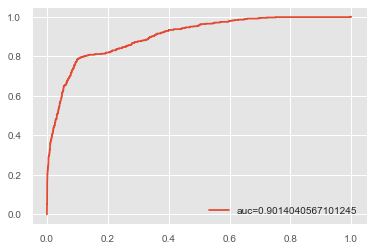


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3158
           1       0.63      0.68      0.66       541

    accuracy                           0.90      3699
   macro avg       0.79      0.81      0.80      3699
weighted avg       0.90      0.90      0.90      3699

Accuracy_svc: 0.8953771289537713


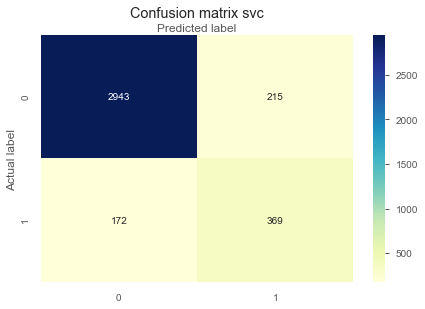

In [71]:
###4. Step 4: Assess the Model
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_svc))
cnf_matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc)

print(cnf_matrix_svc)


#AUC for y1
y_SVM_pred_proba = grid_svc.predict_proba(X_test[best_features])[::,1]
fpr_SVM, tpr_SVM, _ = metrics.roc_curve(y_test,  y_SVM_pred_proba)
auc_SVM = metrics.roc_auc_score(y_test, y_SVM_pred_proba)
plt.plot(fpr_SVM,tpr_SVM,label="auc="+str(auc_SVM))
plt.legend(loc=4)
plt.show()
print("")

class_names_svc=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_svc = np.arange(len(class_names_svc))
plt.xticks(tick_marks_svc, class_names_svc)
plt.yticks(tick_marks_svc, class_names_svc)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix svc', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred_svc))
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_svc))

### 3.5. XGBoost Model (XGB)
>   <b> Accuracy: </b> 89%
<br><b> AUC: </b> 89%
<br><b> RMSE: </b> .32
<br><b> Next Steps: </b> Additional parameter tuning


###0. Step 0: Import Needed Packages

In [75]:
#Import Needed Packages
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

#Do preliminary work


###1. Step 1: Specify the Model

In [76]:
#Instantiate an XGBoost Classifer Model - for y1 (No_Sale)
XGB_class = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)


In [77]:
# https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784

from sklearn.linear_model import LassoCV

regr = LassoCV(cv=5, random_state=101,n_jobs =10 )
regr.fit(X_train, y_train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_test, y_test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0))) 
#lasso_support = regr.get_support()

LassoCV Best Alpha Scored:  0.00022150867651258457
LassoCV Model Accuracy:  0.3906953379843
Variables Eliminated:  4
Variables Kept:  20


Text(0.5, 1.0, 'Most Important Features Identified using Lasso')

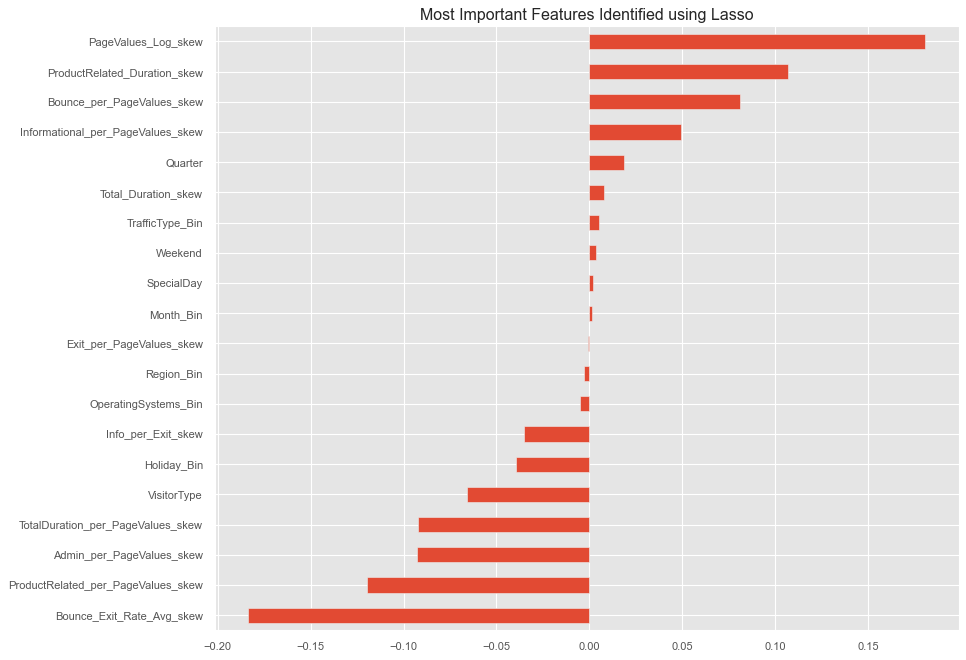

In [78]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values() # possible sort by index
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso")

In [79]:
top_lasso = top_coef[abs(top_coef) > 0.04]
lasso_best = top_lasso.index.tolist()
display(lasso_best)

['Bounce_Exit_Rate_Avg_skew',
 'ProductRelated_per_PageValues_skew',
 'Admin_per_PageValues_skew',
 'TotalDuration_per_PageValues_skew',
 'VisitorType',
 'Informational_per_PageValues_skew',
 'Bounce_per_PageValues_skew',
 'ProductRelated_Duration_skew',
 'PageValues_Log_skew']

In [80]:
# PARAMETER OPTIMIZATION CODE USING GRID SEARCH: 

#Add in GridSearchCV
from sklearn.model_selection import GridSearchCV

#Define the grid
objective=['reg:squarederror','binary:logistic']
learning_rate=[.1,0.5,1]
max_depth=[1, 3, 5]
colsample_bytree = [0.3,0.2,0.1]
param_grid = dict(objective=objective,learning_rate=learning_rate,max_depth=max_depth,colsample_bytree=colsample_bytree)

#Run the grid search
import time

# XGB = xgb.XGBClassifier(reg_alpha = 10, reg_lambda = 10, n_estimators = 100) #in case we want to use later
XGB = xgb.XGBClassifier(n_estimators = 100)
grid_xgb = GridSearchCV(estimator=XGB, param_grid=param_grid, cv = 10, n_jobs=-1)

#start_time = time.time()
grid_result_xgb = grid_xgb.fit(X_train[best_features], y_train)
# Summarize results
print("Best: %f using %s" % (grid_result_xgb.best_score_, grid_result_xgb.best_params_))

#The below is for execution time - not important for us right now, so commented out
# print("Execution time: " + str((time.time() - start_time)) + ' ms')


# INFO/CODE FROM TUTORIAL
# learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
# max_depth: determines how deeply each tree is allowed to grow during any boosting round.
# subsample: percentage of samples used per tree. Low value can lead to underfitting.
# colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
# n_estimators: number of trees you want to build - the more trees you build, the longer the training will be.
# objective: determines the loss function to be used like reg:squarederror for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.
# XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

# gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
# alpha: L1 regularization on leaf weights. A large value leads to more regularization.
# lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 100)

Best: 0.897925 using {'colsample_bytree': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'objective': 'binary:logistic'}


In [81]:
xgb_Peram_dict = grid_result_xgb.best_params_

###2. Steps 2-4: Generate Test Data, Build the Models & Assess the Models for y2 (Sale)

In [82]:
#Put Data into structure for XGBoost- for y2 (Sale) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

#Train the model using the training sets for y1
#grid_xgb.fit(X_train[lasso_best], y_train)

#Predict the response for test dataset for y1
y_XGB_pred = grid_xgb.predict(X_test[best_features])

#Calculate RMSE for y2
rmse_XGB = np.sqrt(mean_squared_error(y_test, y_XGB_pred))
print("XGBoost's RMSE for y2 is: %f" % (rmse_XGB))

#Create error ratio to evaluate results for y2
target_range_XGB = y.max() - y.min()
print("XGB target range is: %f" % (target_range_XGB))
error_ratio_XGB = rmse_XGB/target_range_XGB
print("XGBoost's Error Ratio for y2 is: %f" % (error_ratio_XGB))

XGBoost's RMSE for y2 is: 0.319671
XGB target range is: 1.000000
XGBoost's Error Ratio for y2 is: 0.319671


In [83]:
#ISSUE WITH THE ABOVE - HOW COME THE TARGET RANGE IS 1? DOES IT HAVE TO DO WITH 0/1 STATUS OF TARGET VARIABLE???

y Accuracy: 0.8978102189781022

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.67      0.58      0.62       541

    accuracy                           0.90      3699
   macro avg       0.80      0.77      0.78      3699
weighted avg       0.89      0.90      0.89      3699



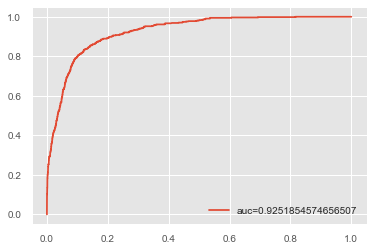

Text(0.5, 257.44, 'Predicted label')

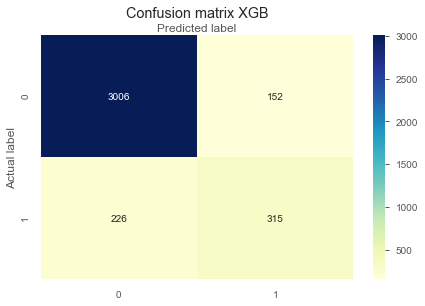

In [84]:
# Model Accuracy, how often is the classifier correct?
# Accuracy for y2
print("y Accuracy:",metrics.accuracy_score(y_test, y_XGB_pred))
print("")


#Can use classification report to assess model adequacy, too
print(metrics.classification_report(y_test, y_XGB_pred, labels=class_names))

#AUC for y1
y_XGB_pred_proba = grid_xgb.predict_proba(X_test[best_features])[::,1]
fpr_XGB, tpr_XGB, _ = metrics.roc_curve(y_test,  y_XGB_pred_proba)
auc_XGB = metrics.roc_auc_score(y_test, y_XGB_pred_proba)
plt.plot(fpr_XGB,tpr_XGB,label="auc="+str(auc_XGB))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_XGB = metrics.confusion_matrix(y_test, y_XGB_pred)
cnf_matrix_XGB
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_XGB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix XGB', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.6 Neural Network Model (NN)
>   <b> Accuracy: </b> 89%
<br><b> AUC: </b> 90%
<br><b> Next Steps: </b> Additional parameter tuning

In [82]:
# X_train, X_test, y1_Models_train, y1_Models_test, y2_Models_train, y2_Models_test


###1. Step 1: Specify the Model
# Import the model
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
# mlp = MLPClassifier(hidden_layer_sizes = (3,1),solver='sgd',learning_rate_init= 0.01, max_iter=50)
# mlp= MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9, 
# beta_2=0.999, early_stopping=False, epsilon=1e-08,       
# hidden_layer_sizes=(7,3), learning_rate='adaptive',      
# learning_rate_init=0.01, max_iter=10, momentum=0.9,       
# nesterovs_momentum=True, power_t=0.5, random_state=1000,       
# shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,       
# verbose=False, warm_start=True)

In [83]:
# nn_feature_selection = forward_selection(X_train, y_train, significance_level=0.05)
nn_feature_selection = best_features

In [84]:
# PARAMETER OPTIMIZATION CODE USING GRID SEARCH: 

#Add in GridSearchCV
from sklearn.model_selection import GridSearchCV
mlp= MLPClassifier()

#Define the grid
activation=['identity','logistic', 'tanh', 'relu']
batch_size=['auto',50,100]
solver=['adam','lbfgs','sgd']
param_grid = dict(activation=activation,batch_size=batch_size,solver=solver)

#Run the grid search
#import time

grid_nn = GridSearchCV(estimator=mlp, param_grid=param_grid, cv = 5, n_jobs=-1)

#start_time = time.time()
grid_result_nn = grid_nn.fit(X_train[nn_feature_selection], y_train)
# Summarize results
print("Best: %f using %s" % (grid_result_nn.best_score_, grid_result_nn.best_params_))

#The below is for execution time - not important for us right now, so commented out
# print("Execution time: " + str((time.time() - start_time)) + ' ms'

Best: 0.900359 using {'activation': 'relu', 'batch_size': 'auto', 'solver': 'adam'}


In [85]:
NN_Peram_dict_1 = grid_result_nn.best_params_

In [86]:
# PARAMETER OPTIMIZATION CODE USING GRID SEARCH: 

#Add in GridSearchCV
from sklearn.model_selection import GridSearchCV
mlp2 = MLPClassifier(**NN_Peram_dict_1)


#Define the grid
hidden_layer_sizes2=[2,3,4,5,6,7,10,2,[6,2],[5,3],[4,3],[4,2],[8,3],[7,3]]
learning_rate2=['adaptive','constant','invscaling']      
random_state2=[100,200,500,1000,2000,3000]
param_grid2 = dict(hidden_layer_sizes=hidden_layer_sizes2,learning_rate=learning_rate2,random_state=random_state2)

#Run the grid search

grid_nn2 = GridSearchCV(estimator=mlp2, param_grid=param_grid2, cv = 3, n_jobs=-1)

#start_time = time.time()
grid_result_nn2 = grid_nn2.fit(X_train[nn_feature_selection], y_train)
# Summarize results
print("Best: %f using %s" % (grid_result_nn2.best_score_, grid_result_nn2.best_params_))

#The below is for execution time - not important for us right now, so commented out
# print("Execution time: " + str((time.time() - start_time)) + ' ms'

Best: 0.899780 using {'hidden_layer_sizes': 7, 'learning_rate': 'adaptive', 'random_state': 1000}


In [101]:
NN_Peram_dict2 = grid_result_nn2.best_params_

In [88]:
###2. Step 2: Generate Test Data
# Train the model
#mlp.fit(X_train[nn_feature_selection], y_train)

In [89]:
###3. Step 3: Build the Model
y_pred_nn = grid_nn2.predict(X_test[nn_feature_selection])


MLP score is 0.8997026223303596
Accuracy_nn: 0.8997026223303596
[[3044  114]
 [ 257  284]]


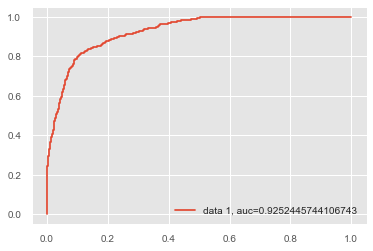

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3158
           1       0.71      0.52      0.60       541

    accuracy                           0.90      3699
   macro avg       0.82      0.74      0.77      3699
weighted avg       0.89      0.90      0.89      3699

Accuracy_svc: 0.8997026223303596


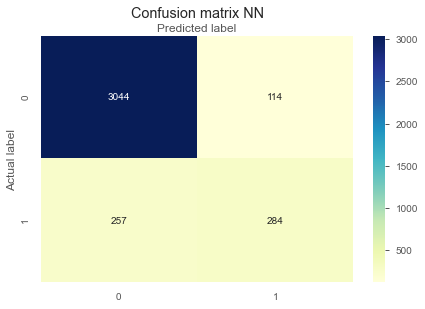

In [90]:
###4. Step 4: Assess the Model
# Score takes a feature matrix X_test and the expected target values y_test. 
# Predictions for X_test are compared with y_test

print("MLP score is",grid_nn2.score(X_test[nn_feature_selection],y_test))

# Accuracy for y NN
#print("y Accuracy NN:",metrics.accuracy_score(y_test, y_XGB_pred))
#print("")

###4. Step 4: Assess the Model
print("Accuracy_nn:",metrics.accuracy_score(y_test, y_pred_nn))
cnf_matrix_nn = metrics.confusion_matrix(y_test, y_pred_nn)

print(cnf_matrix_nn)

# Plot AOC
y_pred_proba_nn = grid_nn2.predict_proba(X_test[nn_feature_selection])[::,1]
fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
plt.legend(loc=4)
plt.show()


class_names_nn=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_nn = np.arange(len(class_names_nn))
plt.xticks(tick_marks_nn, class_names_nn)
plt.yticks(tick_marks_nn, class_names_nn)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix NN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred_nn))
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_nn))

#Plot AOC
# y_pred_proba_nn = mlp.predict_proba(X_test)[::,1]
# fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
# auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
# plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
# plt.legend(loc=4)
# plt.show()

### 3.7 Logistic Regression Model

>   <b> Accuracy: </b> 89%
<br><b> AUC: </b> 87%
<br><b> Next Steps: </b> Additional parameter tuning


In [66]:
#Build the model
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)

In [67]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=10)
embeded_lr_selector.fit(X_train, y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

9 selected features
['VisitorType', 'Holiday_Bin', 'Admin_per_Exit_skew', 'Bounce_Exit_Rate_Avg_skew', 'Exit_per_PageValues_skew', 'Informational_per_PageValues_skew', 'PageValues_Log_skew', 'ProductRelated_per_PageValues_skew', 'TotalDuration_per_PageValues_skew']


In [68]:
# PARAMETER OPTIMIZATION CODE USING GRID SEARCH: 

#Add in GridSearchCV
from sklearn.model_selection import GridSearchCV

#Define the grid
dual=[True,False]
max_iter=[100,110,120,130,140]
C=[1.0,1.5,2.0,2.5]
solver=['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']
penalty=['l1', 'l2', 'elasticnet', 'none']
param_grid = dict(dual=dual,max_iter=max_iter,C=C,solver=solver,penalty=penalty)

#Run the grid search
#import time

lr = LogisticRegression()
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 10, n_jobs=-1, scoring='f1')

#start_time = time.time()
grid_result_lr = grid_lr.fit(X_train[best_features], y_train)
# Summarize results
print("Best: %f using %s" % (grid_result_lr.best_score_, grid_result_lr.best_params_))

#The below is for execution time - not important for us right now, so commented out
# print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.626808 using {'C': 1.5, 'dual': False, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [69]:
lr_Peram_dict = grid_result_lr.best_params_

In [70]:

# fit the model with data
#logreg.fit(X_train[embeded_lr_feature],y_train)

y_LR_pred=grid_lr.predict(X_test[best_features])

In [71]:
# import the metrics class for the Confusion Matrix
from sklearn import metrics
cnf_matrix_LogR = metrics.confusion_matrix(y_test, y_LR_pred)
cnf_matrix_LogR

array([[2978,  180],
       [ 217,  324]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

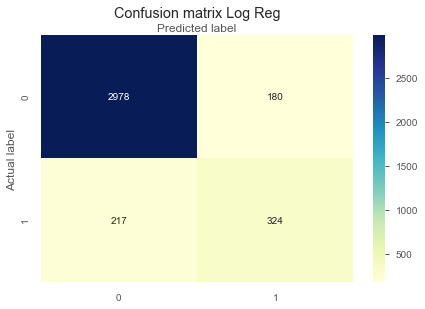

In [72]:
# Visualizing the Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LogR), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Log Reg', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

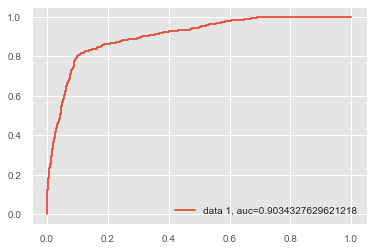

In [73]:
# ROC Curve
y_LR_pred_proba = grid_lr.predict_proba(X_test[best_features])[::,1]
fpr_LR, tpr_LR, _ = metrics.roc_curve(y_test,  y_LR_pred_proba)
auc_LR = metrics.roc_auc_score(y_test, y_LR_pred_proba)
plt.plot(fpr_LR,tpr_LR,label="data 1, auc="+str(auc_LR))
plt.legend(loc=4)
plt.show()

In [74]:
print(metrics.classification_report(y_test, y_LR_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3158
           1       0.64      0.60      0.62       541

    accuracy                           0.89      3699
   macro avg       0.79      0.77      0.78      3699
weighted avg       0.89      0.89      0.89      3699



# 4. Evaluate all the methods and compare using ensemble ranking  <a name="part4.4"></a>

In [102]:
DT_Optimized = DecisionTreeClassifier(**dt_Peram_dict)
RF_Optimized = RandomForestClassifier(**rfc_Peram_dict)
SVM_Optimized = svm.SVC(**svc_Peram_dict)
XGB_Optimized = xgb.XGBClassifier(**xgb_Peram_dict)
GNB_Optimized = GaussianNB()
LR_Optimized = LogisticRegression(**lr_Peram_dict)
NN_Optimized = MLPClassifier(**NN_Peram_dict2)

>lr 0.893 (0.016)
>xgb 0.905 (0.013)
>tree 0.884 (0.017)
>svm 0.901 (0.015)
>nn 0.895 (0.015)
>bayes 0.882 (0.014)
>rforest 0.899 (0.013)


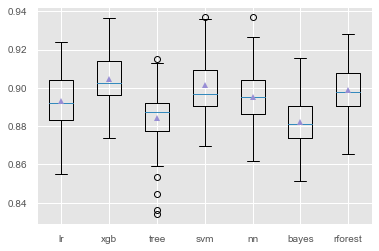

In [103]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
import xgboost as xgb


# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LR_Optimized
    models['xgb'] = XGB_Optimized
    models['tree'] = DT_Optimized
    models['svm'] = SVM_Optimized
    models['nn'] = NN_Optimized
    models['bayes'] = GNB_Optimized
    models['rforest'] = RF_Optimized
    return models

# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=500)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = X_test,y_test
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [104]:
# get a stacking ensemble of models
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('xgb', XGB_Optimized))
    level0.append(('tree', DT_Optimized))
    level0.append(('forest',RF_Optimized ))
    level0.append(('lr', LR_Optimized))
    level0.append(('svm', SVM_Optimized))
    level0.append(('nn', NN_Optimized))
    level0.append(('bayes', GNB_Optimized))
# define meta learner model
    level1 = XGB_Optimized
# define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


>lr 0.893 (0.016)
>xgb 0.905 (0.013)
>tree 0.885 (0.018)
>svm 0.901 (0.015)
>nn 0.895 (0.015)
>bayes 0.882 (0.014)
>rforest 0.899 (0.013)
>stacking 0.901 (0.015)


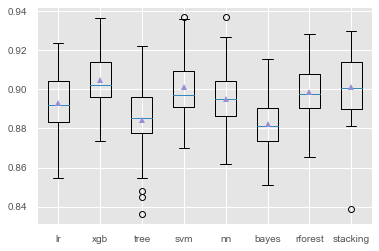

In [105]:
from sklearn.ensemble import StackingClassifier

# get a list of models to evaluate
def get_stacked_models():
    models = dict()
    models['lr'] = LR_Optimized
    models['xgb'] = XGB_Optimized
    models['tree'] = DT_Optimized
    models['svm'] = SVM_Optimized
    models['nn'] = NN_Optimized
    models['bayes'] = GNB_Optimized
    models['rforest'] = RF_Optimized
    models['stacking'] = get_stacking()
    return models


# # evaluate stacked given model using cross-validation
# def evaluate_stacked_model(model):
# 	cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# 	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# 	return scores

# define dataset
X, y = X_test,y_test
# get the models to evaluate
models_stacked = get_stacked_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models_stacked.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# 5. Run and evaluate the Final models with over sampled data using SMOTE  <a name="part4.5"></a>

In [106]:
def get_column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

In [116]:
categorical_features = get_column_index(X_train, Cat_feature_selection).tolist()
categorical_features


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [117]:
# Over sample the data using SMOTE

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC

print('Original dataset shape %s' % Counter(y_train))
smote = SMOTENC(random_state=100,sampling_strategy="minority", categorical_features=categorical_features,n_jobs = 5) # is this for only x? categorical_features=[18, 19]
SMOTE_X_train, SMOTE_y_train = smote.fit_resample(X_train, y_train) #DWM Note: Are we SURE on "Models" in last X_train, y2_train - per SMOTE doc from Tao
print('Resampled dataset shape %s' % Counter(SMOTE_y_train))


# imblearn.over_sampling.SMOTENC(categorical_features, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=1)
# https://towardsdatascience.com/4-tips-for-advanced-feature-engineering-and-preprocessing-ec11575c09ea

Original dataset shape Counter({0: 7264, 1: 1367})
Resampled dataset shape Counter({1: 7264, 0: 7264})


# 6. Run and evaluate the final models using TPOT  <a name="part4.6"></a>

In [109]:
from tpot import TPOTClassifier

# from tpot import TPOTRegressor # for regression tasks

tpot = TPOTClassifier(generations=5,verbosity=2, n_jobs=-1,max_time_mins=30, 
                      max_eval_time_mins=5,scoring=None)

tpot.fit(X_train, y_train) # y_train

Generation 1 - Current best internal CV score: 0.9024440402280998
Generation 2 - Current best internal CV score: 0.9024440402280998
Generation 3 - Current best internal CV score: 0.9037187307308571
Generation 4 - Current best internal CV score: 0.9037187307308571
Generation 5 - Current best internal CV score: 0.9037187307308571

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=3, min_child_weight=8, n_estimators=100, nthread=1, subsample=0.8500000000000001)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               max_eval_time_mins=5, max_time_mins=30, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [110]:
tpot.score(X_test, y_test) # y_test

0.9053798323871317